<a href="https://colab.research.google.com/github/saikumar28102000/THE-SPARK-FOUNDATION/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science and Business Analytics Intern @ The Sparks Foundation

#gripfeb21


### Author: SAI KUMAR T S

 

### Task 3: Exploratory Data Analysis- Retail

Problem Statement 1: Try to find out the weak areas where you can work to make more profit.

Problem Statement 2: What all business problems you can derive by exploring the data?

##### Data Import and Pre-processing

In [ ]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
df=pd.read_csv('Superstore.csv')
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [ ]:
#To show total rows and columns
df.shape

(9994, 13)

In [ ]:
# Data Types of Columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
# To check any Null Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# To check any duplicate rows
df.duplicated().sum()

17

In [ ]:
#dropping those duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#check again to make sure duplicated rows has been dropped
df.duplicated().sum()

0

##### Basic Statistical Details

In [ ]:
# Statistical Details 
df .describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

##### Number of distinct values

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
#dropping  not required columns
df.drop(['Postal Code'],axis=1,inplace=True)

### Data Visualization

In [ ]:
# To see the correlation between the variables
df.corr()

Sales  Quantity  Discount    Profit
Sales     1.000000  0.200722 -0.028311  0.479067
Quantity  0.200722  1.000000  0.008678  0.066211
Discount -0.028311  0.008678  1.000000 -0.219662
Profit    0.479067  0.066211 -0.219662  1.000000

<AxesSubplot:>

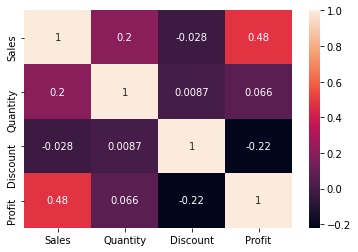

In [ ]:
# Heatmap to see the correlation
sns.heatmap(df.corr(),annot=True)

- Sales and Discount as well as Profit and Discount have -ve correlation

##### ShipMode and Segment

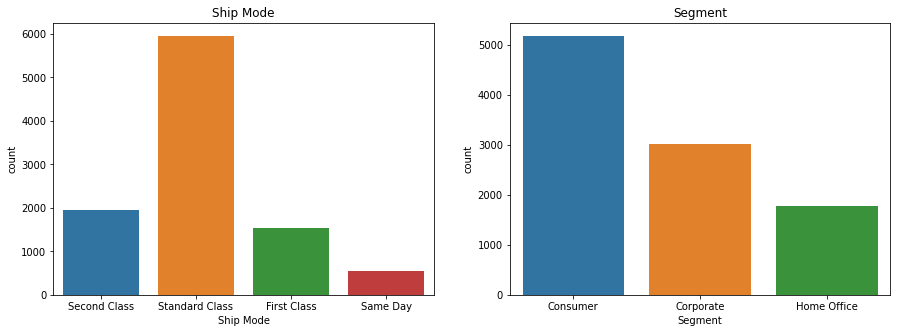

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)           
sns.countplot(x=df['Ship Mode'],data=df)
plt.title('Ship Mode')

plt.subplot(122)           
sns.countplot(x=df['Segment'],data=df)
plt.title('Segment')

plt.show()

Based on Ship Mode
- The most frequently used ship mode is Standard Class
- Least used ship mode is Same Day

Based on Segment
- The most Frequent Segment is Consumer
- Least Segment is Home Office

##### State

Text(0.5, 1.0, 'State')

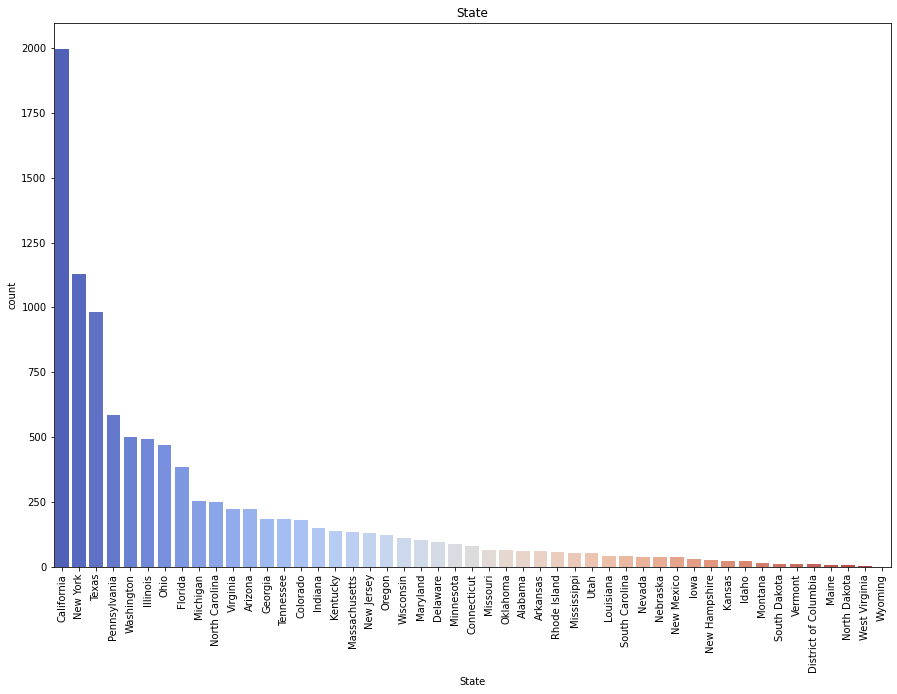

In [ ]:
plt.figure(figsize=(15,10)) 
sns.countplot(x=df['State'],data=df,order= df['State'].value_counts().index,palette='coolwarm')
plt.xticks(rotation=90)
plt.title('State')

Based on State :
- California : Highest no.of deals
- Wyoming  : Lowest no.of deals

##### City

In [ ]:
df['City'].value_counts().head(30)

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Fairfield         45
Name: City, dtype: int64

Text(0.5, 1.0, 'City')

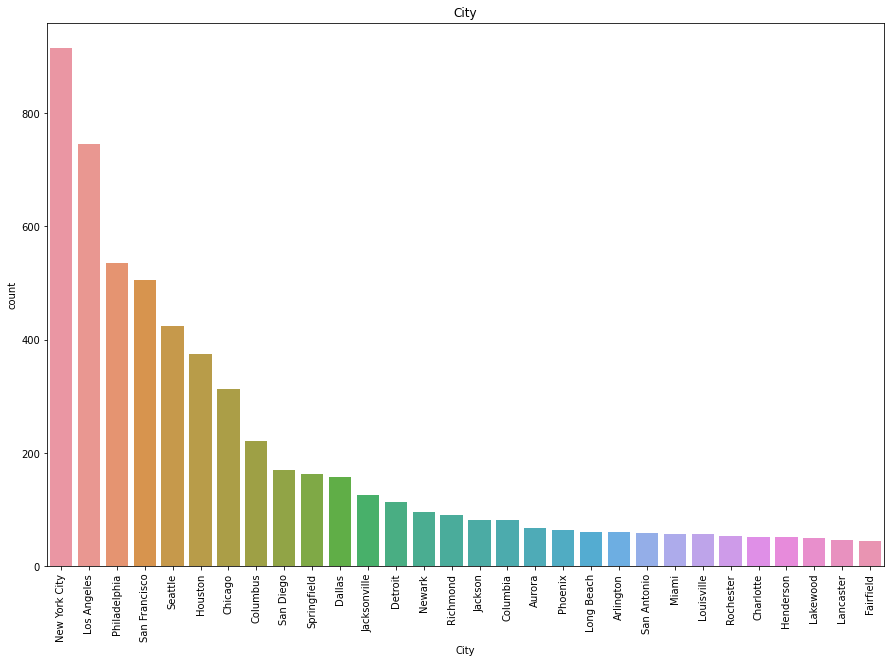

In [ ]:
# The 30 most frequently involved city

plt.figure(figsize=(15,10)) 
sns.countplot(x=df['City'],data=df,order= df['City'].value_counts().head(30).index) 
plt.xticks(rotation=90)
plt.title('City')

##### Region and Category

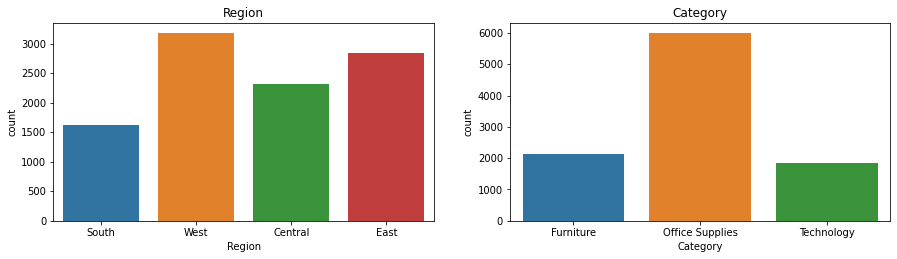

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)           
sns.countplot(x=df['Region'],data=df)
plt.title('Region')

plt.subplot(222)           
sns.countplot(x=df['Category'],data=df)
plt.title('Category')

plt.show()

- West Region has highest no.of deals
- In category, Office Supplies are in most demand

##### Sub-Category

Text(0.5, 1.0, 'Sub-Category')

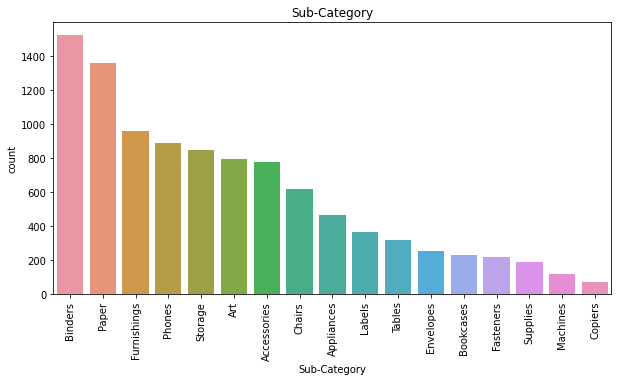

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Sub-Category'],data=df,order=df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Sub-Category')


Based on Sub-Category :
- Binders : Most demanded 
- Copiers : Least demanded 

##### Category wise Average Sales

In [ ]:
# To analyse Category wise Average Sales
df.groupby('Category')["Sales"].mean().sort_values(ascending=True)


Category
Office Supplies    119.550107
Furniture          350.002981
Technology         452.709276
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Sales'>

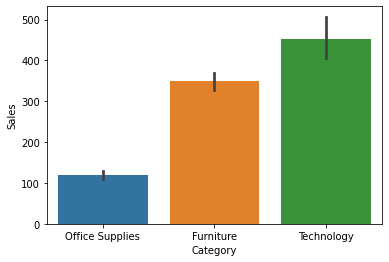

In [ ]:
sns.barplot(x=df['Category'],y=df['Sales'],data=df,
            order=df.groupby('Category')["Sales"].mean().sort_values(ascending=True).index)

##### Category wise Total Sales

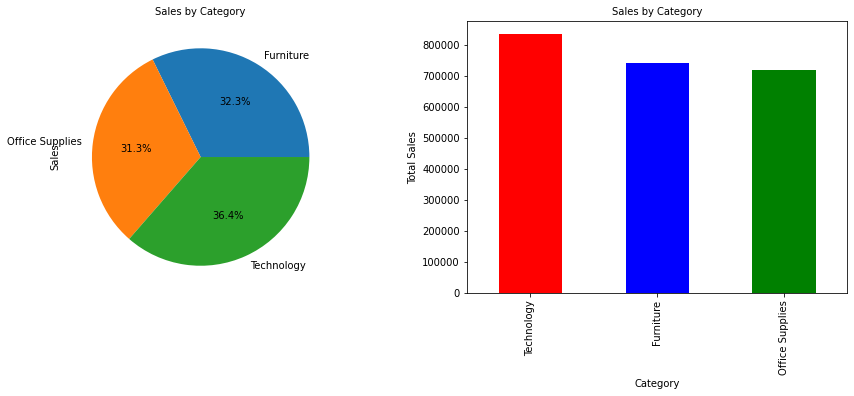

In [ ]:
# To analyse Category wise Total Sales
plt.figure(figsize=(15,5))

plt.subplot(121)
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.1f%%")
plt.title('Sales by Category',fontsize=10);

plt.subplot(122)
df.groupby("Category")["Sales"].sum().sort_values(ascending = False).plot.bar(color=['r','b','g'])
plt.ylabel("Total Sales")
plt.title('Sales by Category',fontsize=10);


Sales by Category :
- Highest total sale is on Technology

##### Category wise Total Profit

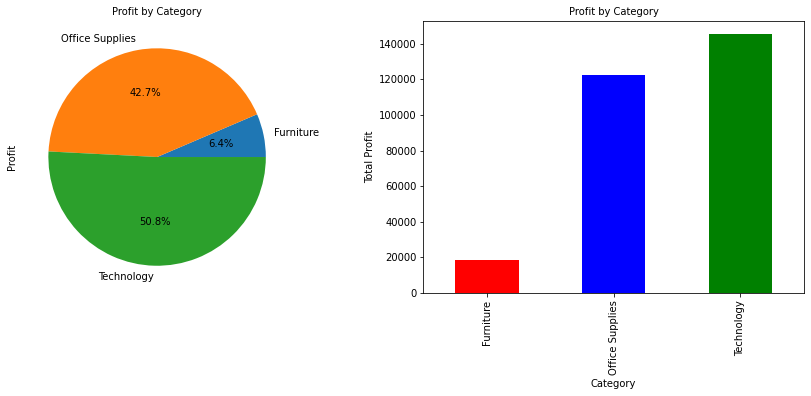

In [ ]:
# To analyse Category wise Total Profit
plt.figure(figsize=(15,5))

plt.subplot(121)
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.1f%%")
plt.title('Profit by Category',fontsize=10);

plt.subplot(122)
df.groupby("Category")["Profit"].sum().plot.bar(color=['r','b','g'])
plt.ylabel("Total Profit")
plt.title('Profit by Category',fontsize=10);


Profit by Category :
- Technology : Highest total profit
- Furniture : Lowest total profit

##### Sub-Category wise Total Sales and Profit

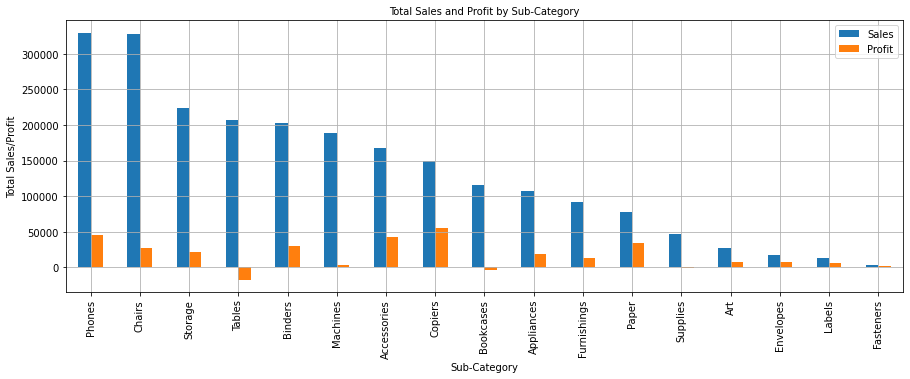

In [ ]:
# To analyse Sub-Category wise Total Sales and Profit

df.groupby("Sub-Category")["Sales","Profit"].sum().sort_values(by = "Sales", ascending = False).plot.bar(figsize=(15,5))
plt.title('Total Sales and Profit by Sub-Category',fontsize=10)
plt.ylabel("Total Sales/Profit")
plt.grid()


Sales by Sub-Category :
- Chairs and Phones : Highest total sales
- Fasteners : Lowest total Sale

Profit by Sub-Category :
- Copiers : Highest total Profit
- Tables : -ve profit, they are in loss


##### Most demanded Sub_Category under each Category

In [ ]:
# Most demanded Sub_Category under each Category
df.groupby('Category')['Sub-Category'].value_counts()

Category         Sub-Category
Furniture        Furnishings      956
                 Chairs           615
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1522
                 Paper           1359
                 Storage          846
                 Art              795
                 Appliances       466
                 Labels           363
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: Sub-Category, dtype: int64

<AxesSubplot:xlabel='Category,Sub-Category'>

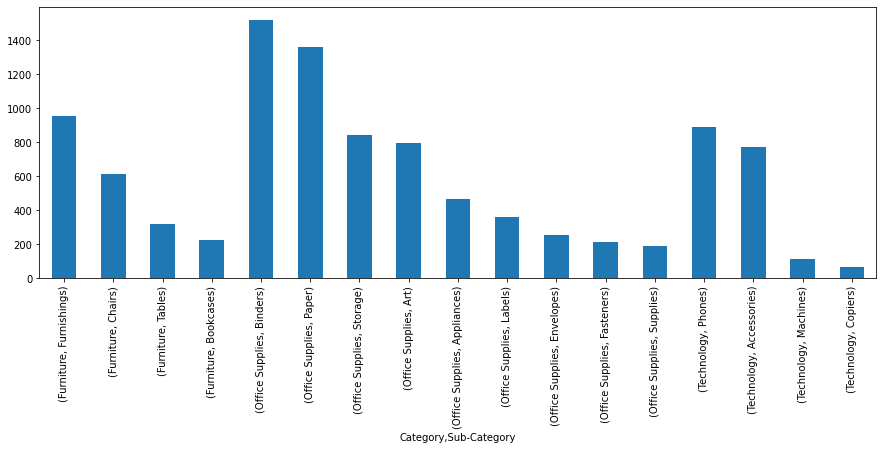

In [ ]:
df.groupby('Category')['Sub-Category'].value_counts().plot.bar(figsize=(15,5))

Furniture :
- Furnishings : Most demanded
- Bookcases : Least Demanded

Office Supplies:
- Binders : Most Demanded
- Supplies : Least Demanded

Technplogy : 
- Phones : Most Demanded
- Copiers : Least Demande

##### sub-category wise total profit and sales under Furniture

Text(0.5, 1.0, 'Furniture')

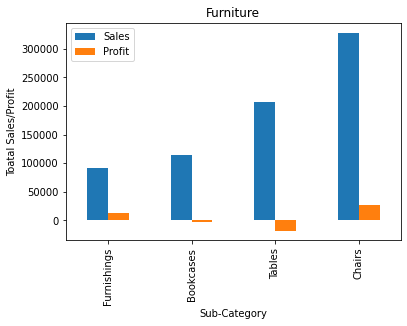

In [ ]:
#To analyse sub-category wise total profit and sales under Furniture
df[df['Category']=='Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().sort_values(by='Sales').plot.bar()
plt.ylabel('Toatal Sales/Profit')
plt.title("Furniture")

 Furniture:
- Though Furnishings are most demanded, their total sale is low
- Sales of Tables are under loss

##### sub-category wise profit and sales under Office Supplies

Text(0.5, 1.0, 'Office Supplies')

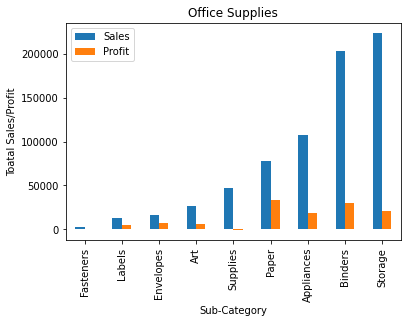

In [ ]:
#To analyse sub-category wise profit and sales under Office Supplies
df[df['Category']=='Office Supplies'].groupby('Sub-Category')['Sales','Profit'].sum().sort_values(by='Sales').plot.bar()
plt.ylabel('Toatal Sales/Profit')
plt.title("Office Supplies")


Office Supplies :
- Storage : Highest total Sales
- Papers : Highest total Profit 

##### sub-category wise Total profit and sales under Technology

Text(0.5, 1.0, 'Technology')

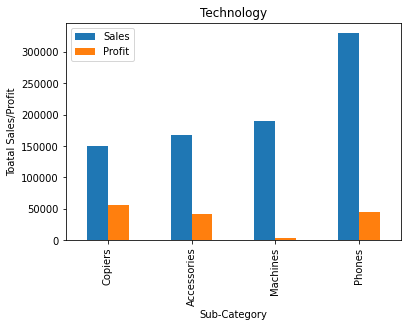

In [ ]:
#To analyse sub-category wise Total profit and sales under Technology
df[df['Category']=='Technology'].groupby('Sub-Category')['Sales','Profit'].sum().sort_values(by='Sales').plot.bar()
plt.ylabel('Toatal Sales/Profit')
plt.title("Technology")

Technology :
- Phones : Highest total Sales
- Copiers : Highest total Profit

##### State wise Total Sales and Profit

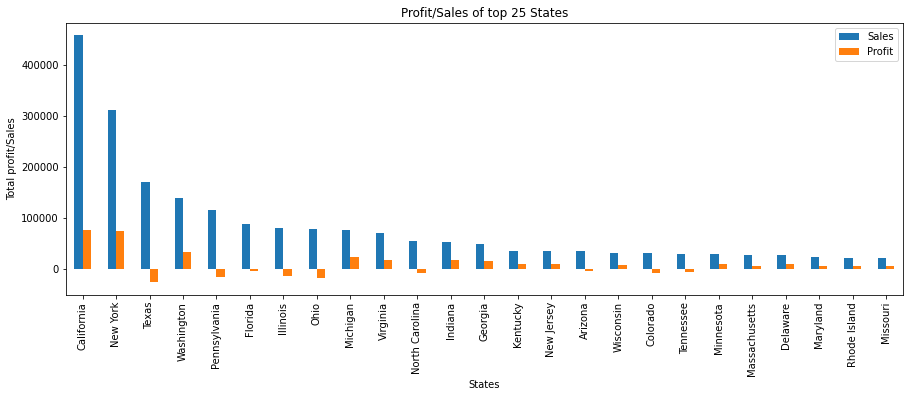

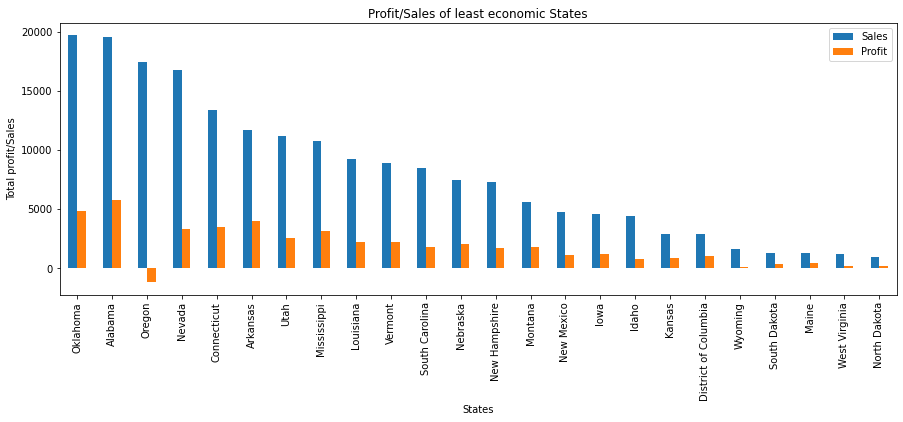

In [ ]:
#To analyse State wise Total Sales and Profit

df.groupby("State")['Sales','Profit'].sum().sort_values(by='Sales',ascending=False)[:25].plot.bar(figsize=(15,5))
plt.title("Profit/Sales of top 25 States")
plt.xlabel("States")
plt.ylabel("Total profit/Sales")
plt.show()

df.groupby("State")['Sales','Profit'].sum().sort_values(by='Sales',ascending=False)[25:].plot.bar(figsize=(15,5))
plt.title("Profit/Sales of least economic States")
plt.xlabel("States")
plt.ylabel("Total profit/Sales")
plt.show()

Sales by State :
- California : highest total Sales
- North Dakota : lowest total Sales

Profit by State :
- California and NewYork : Highest total Profit

- Many states have -ve profit though they have considerably good Sales

##### Region wise Total Sales and Profit

Text(0, 0.5, 'Total Sales/Profit')

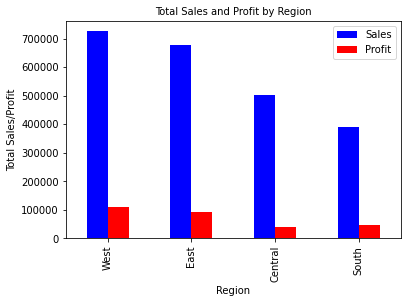

In [ ]:
#To analyse Region wise Total Sales and Profit

df.groupby("Region")['Sales','Profit'].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['b','r'])
plt.title('Total Sales and Profit by Region',fontsize=10)
plt.ylabel("Total Sales/Profit")


Sales by Region:
- West : Highest total Sales
- South : Lowest Total Sales

Profit by Region:
- West : Highest total Profit
- Central : Lowest Total Profit

##### City wise Total Sales and Profit

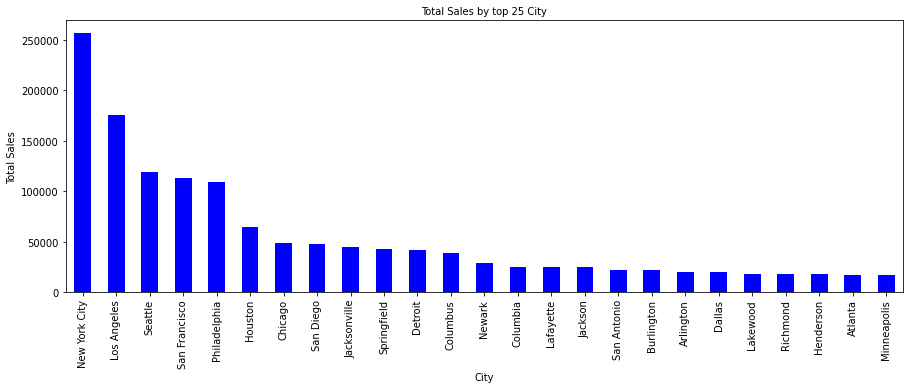

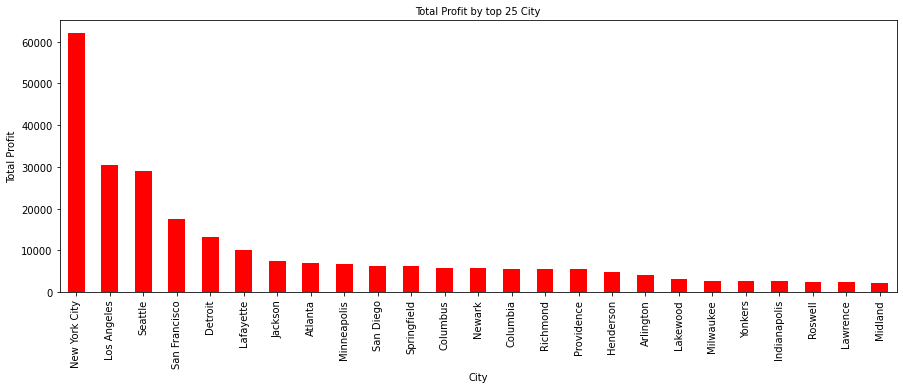

In [ ]:
#To analyse City wise Total Sales and Profit

df.groupby("City")['Sales'].sum().sort_values(ascending=False).head(25).plot.bar(color=['b'],figsize=(15,5))
plt.title('Total Sales by top 25 City',fontsize=10)
plt.ylabel("Total Sales")
plt.show()

df.groupby("City")['Profit'].sum().sort_values(ascending=False).head(25).plot.bar(color=['r'],figsize=(15,5))
plt.title('Total Profit by top 25 City',fontsize=10)
plt.ylabel("Total Profit")
plt.show()

Sales by City:
- New York City : Highest total Sales
- Los Angeles follows New York City

Profit by city:
- New York City : Highest total Profit
- Los Angeles follows New York City



##### ShipMode vs Sales

Text(0.5, 1.0, '\nTotal Sales by Ship Mode\n')

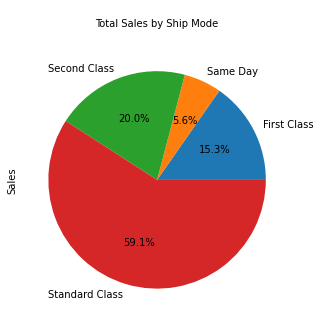

In [ ]:
#To analyse Ship Mode wise Total Sales

df.groupby("Ship Mode")['Sales'].sum().plot.pie(autopct="%1.1f%%",figsize=(10,5))

plt.title('\nTotal Sales by Ship Mode\n',fontsize=10)



Maximum Sales are through Standard Class Ship Mode

##### Segment wise Total Sales and Profit

Text(0, 0.5, 'Total Sales/Profit')

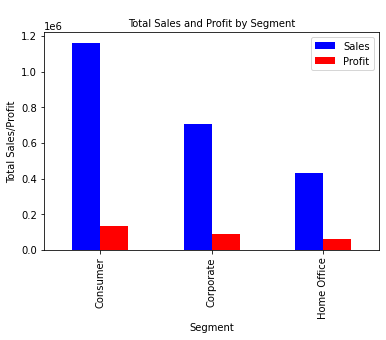

In [ ]:
#To analyse Segment wise Total Sales and Profit
df.groupby("Segment")['Sales','Profit'].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['b','r'])
plt.title('\nTotal Sales and Profit by Segment',fontsize=10)
plt.ylabel("Total Sales/Profit")

Sales by Segment:
- Consumer : Highest total Sales
- Home Office : Lowest Total Sales

Profit by Segment:
- Consumer : Highest total Profit
- Home Office : Lowest Total Profit

##### Sales_max

In [ ]:
df.Sales.max()

22638.48

In [ ]:
#Details about that maximum sale
df.iloc[df.Sales.idxmax()]

Ship Mode        Standard Class
Segment             Home Office
Country           United States
City               Jacksonville
State                   Florida
Region                    South
Category        Office Supplies
Sub-Category              Paper
Sales                    21.376
Quantity                      4
Discount                    0.2
Profit                   7.4816
Name: 2698, dtype: object

##### Profit_max

In [ ]:
df.Profit.max()

8399.976

In [ ]:
#Details about that maximum profit
df.iloc[df.Profit.idxmax()]

Ship Mode        Standard Class
Segment               Corporate
Country           United States
City              Thousand Oaks
State                California
Region                     West
Category        Office Supplies
Sub-Category             Labels
Sales                    152.65
Quantity                      5
Discount                    0.0
Profit                   70.219
Name: 6835, dtype: object

##### Profit vs Discount

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

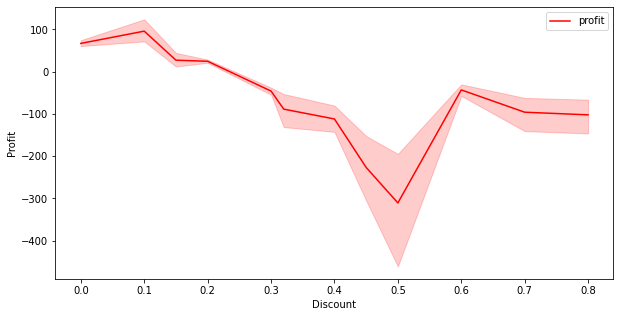

In [ ]:
#To analyse Profit vs Discount
plt.figure(figsize = (10,5))
sns.lineplot(x=df['Discount'],y=df['Profit'], data = df, color='r', label='profit')

- Profit and Discount have a weak and -ve relationship

### Insights :

Based on Ship Mode :
- Standard Class is the most frequently demanded Ship Mode and most of the Sales are done through this.
- Same Day is least frequently demanded Ship Mode and total Sales through this is also low.

Based on Segment:
- Most frequent Segment is Consumer. Highest total Sales and Profit is also for Consumer segment
- Least frequent Segment is Home office. Lowest total Sales and Profit is also for this segment
- Corporate has moderate total Sales and Profit

Based on City:
- Highest no.of deals are from NewYork City followed by LosAngeles. Highest total Sales and Profit is also for NewYork City followed by LosAngeles

Based on State:
- Highest no.of deals are from California followed by NewYork.Least no.of deals are from Wyoming
- California has highest total Sales and Profit followed by NewYork

Based on Region :
- West region has highest total Sales and profit followed by East and Central region respectively.
- South Region has lowest total Sales and Profit

Based on Category:
- Office Supplies are in most demand followed by Furniture and Technology respectively.
- Technology has highest total Sales and Profit.
- Though Office Supplies are most demanded one, their toatal Sales is less. Increase in sales to meet the demand may result to the increase in Profit.
- Furniture Category should be focussed, to obtain a good profit.

Based on Sub-Category under Category :
- Under Furniture, Furnishings are the most demanded one followed by Chairs and Tables respectively. But total Sales of Furnishings is low. Tables have a -ve profit

- Under Office Supplies, Binders are the most demanded followed by Paper. Fasteners and Supplies are the least demanded one. Storage has highest total Sales and Paper has highest total Profit.

- Under Technology, Phones are the most demanded followed by Accessories.Copiers has less demand. Phones has highest total Sales and  Copiers has highest total Profit

Based on Sub-Category :
- Under the whole Sub-Category, Binders are the most demanded followed by paper and furnishings respectively. Copiers has less demand
- Phones has highest total Sales followed by Chairs
- Copiers has highest total Profit followed by Phones which implies their demand is met by sales.
- Though Binders are most demanded one, their toatal Sales is low. Increase in sales to meet the demand may result to the increase in Profit.
- Tables have -ve profit, which should be taken care of.

Based on Discount :
- Sales and Discount have a -ve relationship {corr()= -0.028}
- Profit and Discount have a weak and -ve relationship { corr()= -0.22}
- Focus on Discount and take appropriate steps so that it doesn't affect Sales and Profit negatively